# Operational Analysis

**Calculating utilization of a road with 20 cars driving per hour at peak traffic and the drive along the road with no traffic is 1 minute**

In [1]:
lambda1 = 20 #poisson arrival
time = 1 #exponential drive time
mu = 60/time 
Utilization1 =  lambda1/mu 
cat ("Utilization is : ", Utilization1)

Utilization is :  0.3333333

In [2]:
W_s = 1/(mu-lambda1) 
cat("An average customer will spend", (W_s * 60), " minutes on the road in peak traffic") 

An average customer will spend 1.5  minutes on the road in peak traffic

In [8]:
lambda2 = 45 
Utilization2 =  lambda2/mu 
cat ("Utilization is : ", Utilization2) 

W_s = 1/(mu-lambda2) 
cat(" An average customer will spend", (W_s * 60), " minutes on the road in peak traffic") 

Utilization is :  0.75 An average customer will spend 4  minutes on the road in peak traffic

**Change in wait times with each additional car**

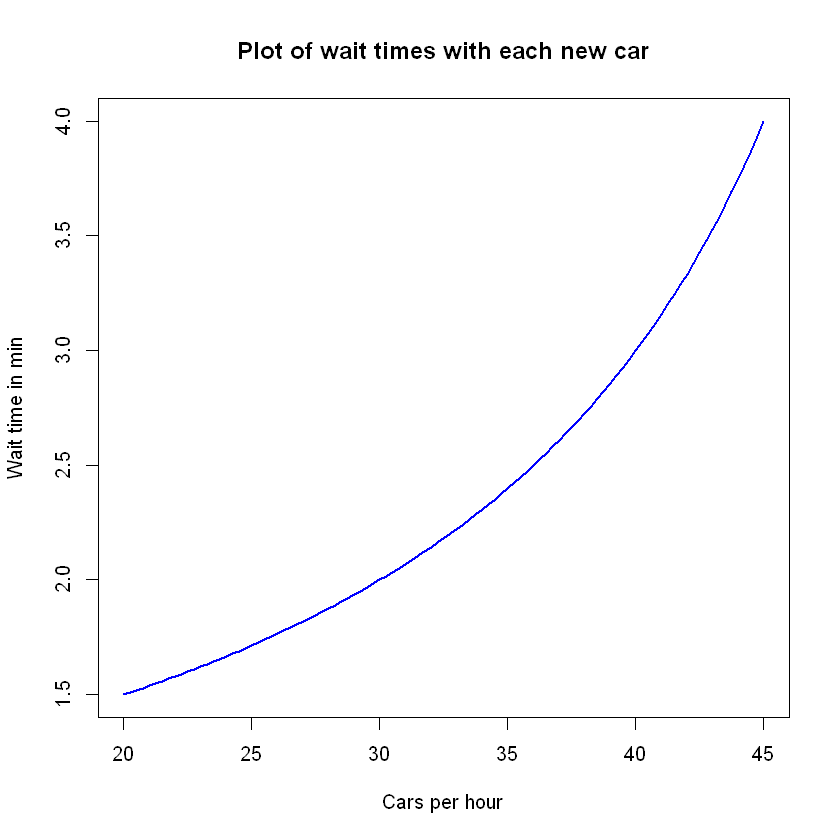

In [4]:
## Option 1: plotting time in system
eqn = function(x){(1/(mu-x))*60} 
curve(eqn, from=lambda1, to=lambda2, xlab="Cars per hour", ylab="Wait time in min", col="blue",lwd=2, main="Plot of wait times with each new car") 

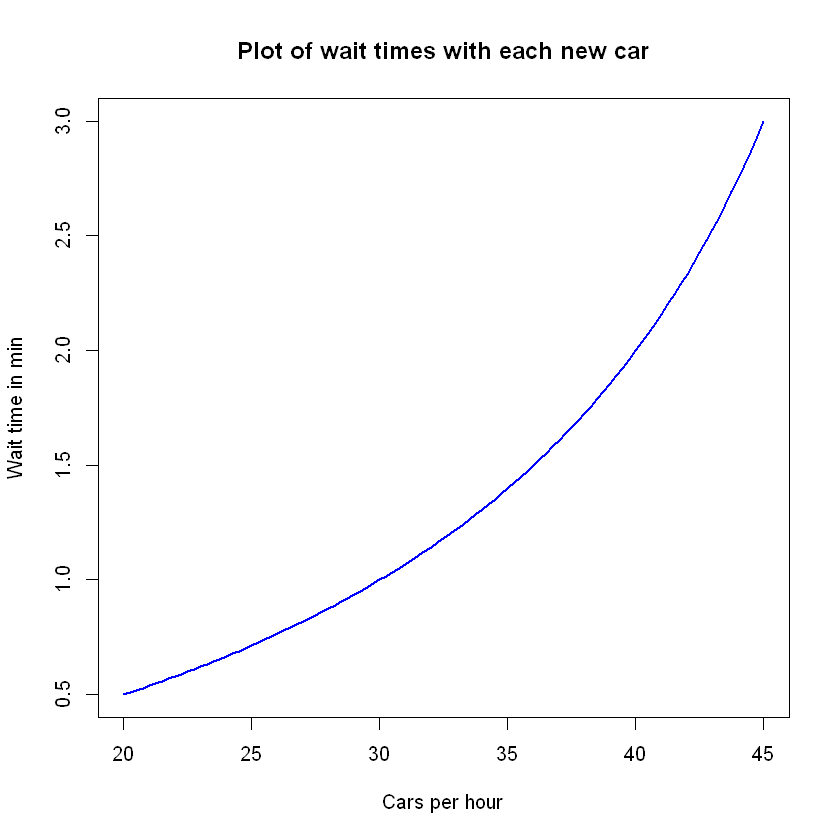

In [5]:
## Option 2: plotting time in queue
eqn = function(x){(x/mu/(mu-x))*60} 
curve(eqn, from=lambda1, to=lambda2, xlab="Cars per hour", ylab="Wait time in min", col="blue",lwd=2, main="Plot of wait times with each new car")

In [6]:

a = (1-Utilization2)*(Utilization2)^0 
b = (1-Utilization2)*(Utilization2)^1 
c = (1-Utilization2)*(Utilization2)^2 

prob = 1 - (a + b + c)
#prob

cat("There is a 42.1875% probability that at least 3 cars are waiting") 

There is a 42.1875% probability that at least 3 cars are waiting

# Control Charts - sample from cemenet factory. Use statistical control chart to test if the process is in control.

In [21]:
data = read.csv("concrete.csv", stringsAsFactors = FALSE)
head(data, 5)

Date,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1/8/2022,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
1/10/2022,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
1/12/2022,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
1/14/2022,332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
1/16/2022,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30


In [22]:

#data$Date = as.numeric(data$Date) 
data$X_bar = rowMeans(data[,-1]) 
data$R = apply(data[,2:9], 1, max)-apply(data[,2:9], 1, min) 
Stdv = sd(as.matrix(data[,2:9])) 
X_dbl_bar = mean(data$X_bar) 
R_bar = mean(data$R) 

# Calculate the upper control limit and lower control limit for the X-bar chart. 
# Calculate the Center of the two limits 
A_2 = 0.373
UCLx = X_dbl_bar + (A_2 * R_bar) 
LCLx = X_dbl_bar - (A_2 * R_bar) 
CenterX = X_dbl_bar

# Calculate the upper control limit and lower control limit for the R chart. Calculate the Center of the two limits. 
D_3 = 0.136
D_4 = 1.864
UCLr = D_4 * R_bar 
LCLr = D_3 * R_bar 
CenterR = R_bar
CenterR2=0.5*(UCLr+LCLr)
## TA code uses mean of UCLr and LCLr as centerR, this is also acceptable as solution. 
cat("The UCLx is", round(UCLx,2), "the LCLx is", round(LCLx,2), "the UCLr is", round(UCLr,2), "and the LCLr is", round(LCLr,2))

The UCLx is 632.81 the LCLx is -93.92 the UCLr is 1815.87 and the LCLr is 132.49

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


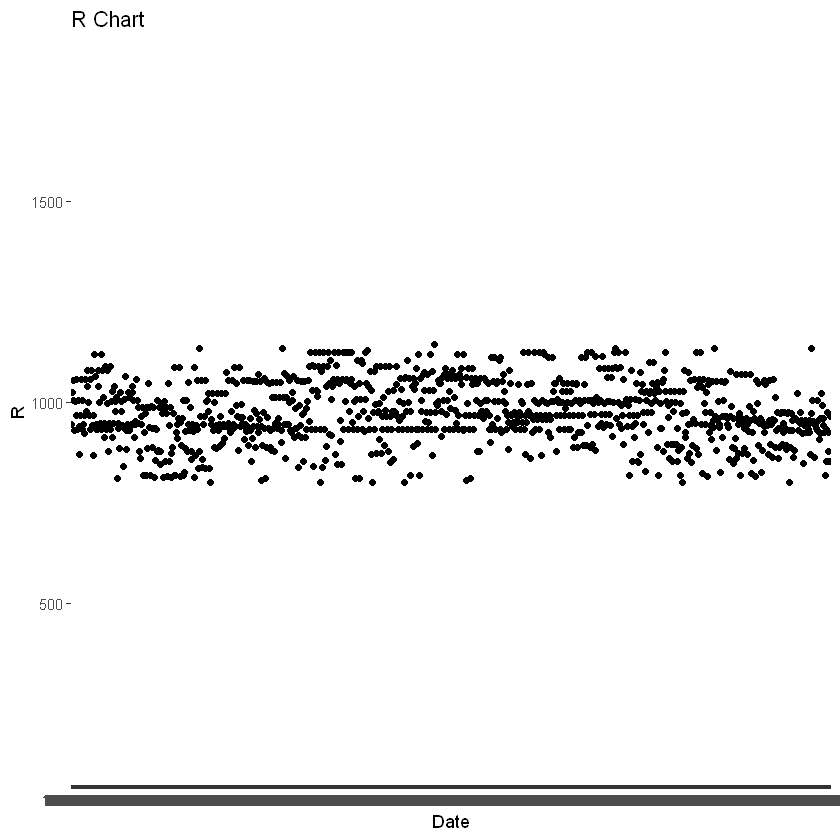

From X-Bar and R-Bar charts, there is no sign of assignable cause of variation. 

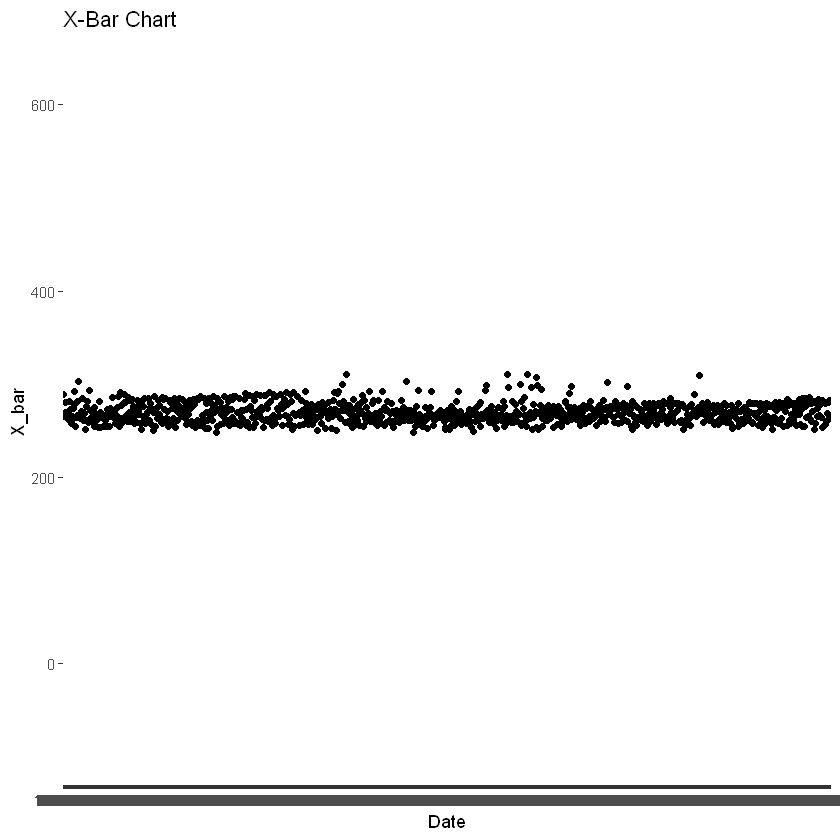

In [23]:
library(ggplot2)
ggplot(data, aes(x=Date, y=R)) + geom_point() + geom_line() + geom_line(aes(y=LCLr), color="blue") + geom_line(aes(y=UCLr), color="red") + geom_line(aes(y=CenterR), color="orange")+ ggtitle("R Chart") 
ggplot(data, aes(x=Date, y=X_bar)) + geom_point() + geom_line() + geom_line(aes(y=LCLx), color="blue") + geom_line(aes(y=UCLx), color="red") + geom_line(aes(y=CenterX), color="orange") +ggtitle("X-Bar Chart") 

cat( "From X-Bar and R-Bar charts, there is no sign of assignable cause of variation. ")

Warning message:
"Removed 625 rows containing missing values (geom_point)."Warning message:
"Removed 625 row(s) containing missing values (geom_path)."Warning message:
"Removed 625 row(s) containing missing values (geom_path)."Warning message:
"Removed 625 row(s) containing missing values (geom_path)."Warning message:
"Removed 625 row(s) containing missing values (geom_path)."Warning message:
"Removed 625 rows containing missing values (geom_point)."Warning message:
"Removed 625 row(s) containing missing values (geom_path)."Warning message:
"Removed 625 row(s) containing missing values (geom_path)."Warning message:
"Removed 625 row(s) containing missing values (geom_path)."Warning message:
"Removed 625 row(s) containing missing values (geom_path)."

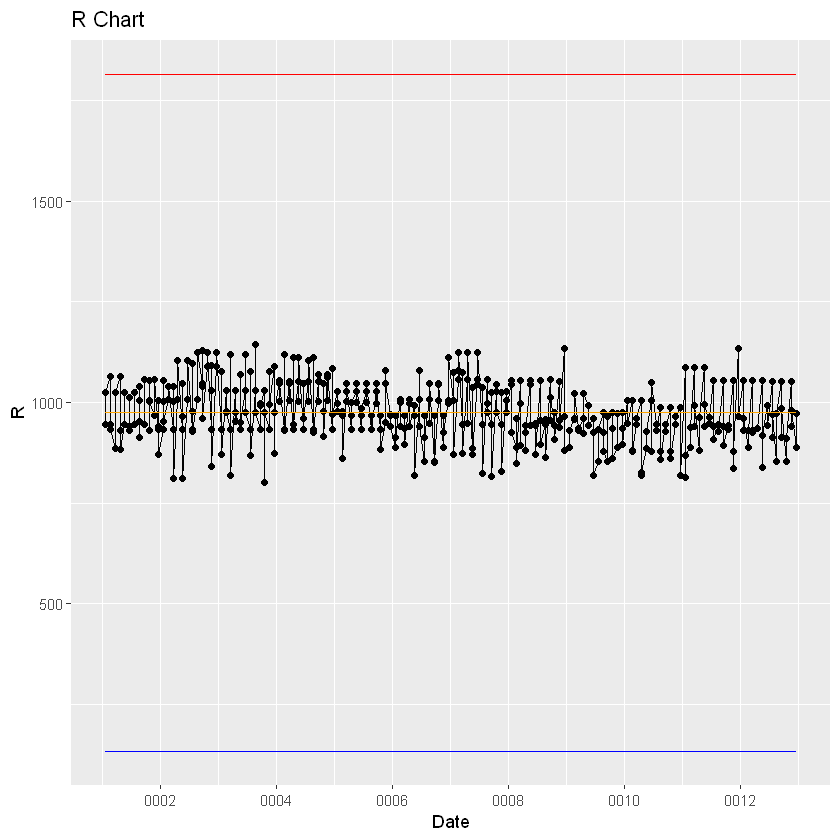

From X-Bar and R-Bar charts, there is no sign of assignable cause of variation.

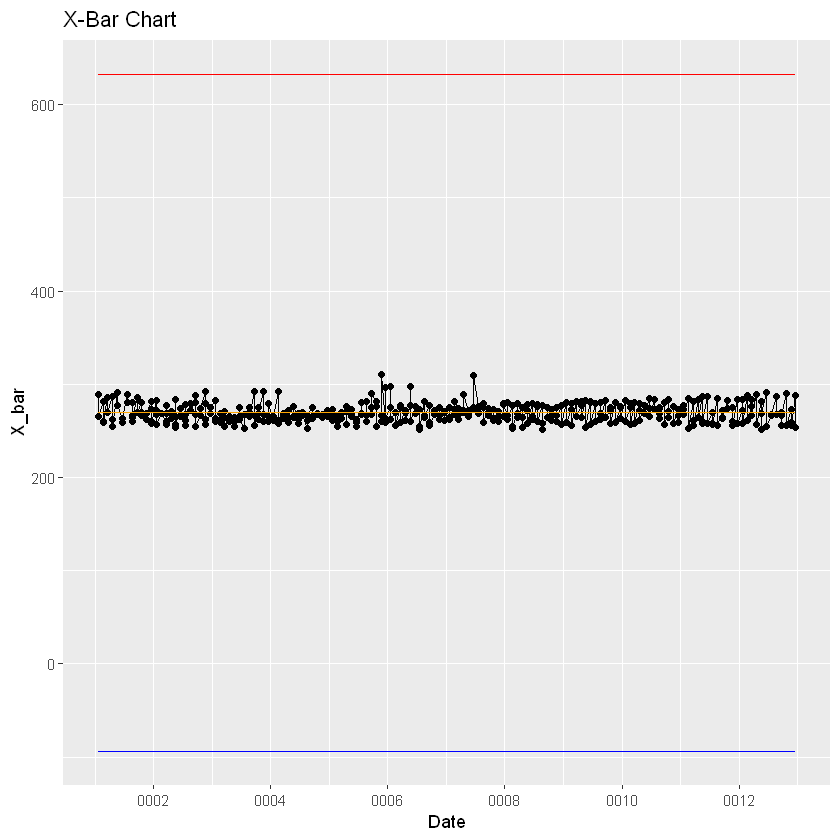

In [26]:
library(ggplot2)

# Assuming data$Date is a Date or DateTime variable
#data$Date <- as.Date(data$Date)

# R Chart
ggplot(data, aes(x = Date, y = R)) + 
  geom_point() + 
  geom_line(aes(group = 1)) +  # Specify a constant grouping variable
  geom_line(aes(y = LCLr), color = "blue") + 
  geom_line(aes(y = UCLr), color = "red") + 
  geom_line(aes(y = CenterR), color = "orange") + 
  ggtitle("R Chart")

# X-Bar Chart
ggplot(data, aes(x = Date, y = X_bar)) + 
  geom_point() + 
  geom_line(aes(group = 1)) +  # Specify a constant grouping variable
  geom_line(aes(y = LCLx), color = "blue") + 
  geom_line(aes(y = UCLx), color = "red") + 
  geom_line(aes(y = CenterX), color = "orange") +
  ggtitle("X-Bar Chart")

cat("From X-Bar and R-Bar charts, there is no sign of assignable cause of variation.")


In [28]:
upper_spec = 45 
lower_spec = 25 

Cp = (upper_spec - lower_spec)/(6*Stdv) 
cat("Cp = ", Cp) 

Cpk = min(((upper_spec - X_dbl_bar)/(3*Stdv)), ((X_dbl_bar - lower_spec)/(3*Stdv))) 
cat(" Cpk = ", Cpk)

cat(". Both Cp and Cpk show that this process is NOT capable of meeting the specifications.")

Cp =  0.009458814 Cpk =  -0.2122982. Both Cp and Cpk show that this process is NOT capable of meeting the specifications.